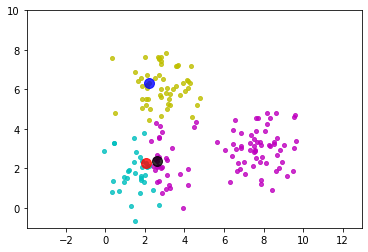

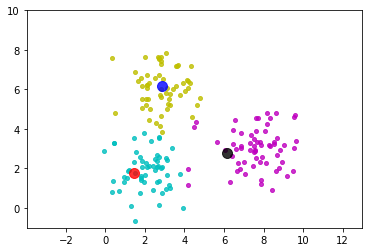

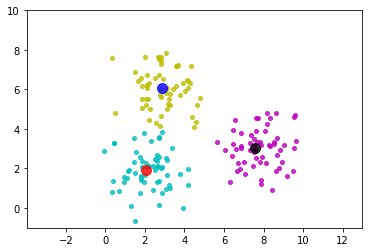

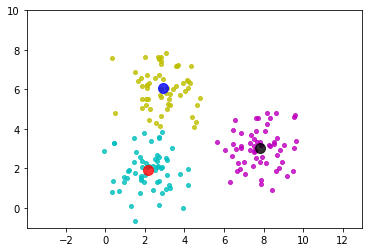

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(11)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 60
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis=0)


def initialize_centroids(X, k):
    centroid = X.copy()
    np.random.shuffle(centroid)
    return centroid[:k]


def get_centroid(x, centroid):
    result = np.sqrt((centroid[:, 0].reshape(-1,1)- x[0])**2 + (centroid[:, 1].reshape(-1,1) - x[1])**2)
    res = result.argmin()
    return res

def distance(X, centroid):
    label = np.apply_along_axis(get_centroid, 1, X, centroid)
    return label

def move_centroids1(X, closest, centroids):
    return np.array([X[closest == i].mean(axis=0) for i in range(centroids.shape[0])])

def kmeans(A, oldcentroid):
    while True:
        f = distance(A, oldcentroid)
        newcentroid = move_centroids1(A, f, oldcentroid)
        if np.array_equal(newcentroid, oldcentroid)==True:
            p=newcentroid
            break
        oldcentroid = newcentroid
    return f
        
def kmeans_display(X, k,oldcentroid):
    color = ['y','m','c','r', 'k','g']
    color1 = ['b','k','r','g','w']
    while True:
        label = distance(X, oldcentroid)
        unique_label = np.unique(label)
        newcentroid = move_centroids1(X, label, oldcentroid)
        if np.array_equal(newcentroid, oldcentroid)==True:
            p=newcentroid
            for i in range(k):
                cluster = X[label == unique_label[i]]
                plt.plot(cluster[:, 0], cluster[:, 1], color[i] + 'o', markersize=4, alpha=.8)
                plt.plot(p[i][0],p[i][1],color1[i]  + 'o', markersize=10, alpha=.8)
            plt.axis('equal')
            plt.xlim(left = -1, right = 10)
            plt.ylim((-1,10))
            plt.show()
            break 
        else:
            #oldcentroid = newcentroid
            for i in range(k):
                cluster = X[label == unique_label[i]]
                plt.plot(cluster[:, 0], cluster[:, 1], color[i] + 'o', markersize=4, alpha=.8)
                plt.plot(oldcentroid[i][0],oldcentroid[i][1], color1[i]  + 'o', markersize=10, alpha=.8)
            plt.axis('equal')
            plt.xlim(left = -1, right = 10)
            plt.ylim((-1,10))
            plt.show()
            oldcentroid = newcentroid
c = initialize_centroids(X, 3)
e = kmeans(X, c)
g=kmeans_display(X, 3, c)
g
